In [47]:
import requests
import string
from collections import defaultdict
import numpy as np

In [1]:
print(f"This is a test for GitHub")

This is a test for GitHub


In [48]:
master_url = "https://raw.githubusercontent.com/dennybritz/cnn-text-classification-tf/master/data/rt-polaritydata/rt-polarity."
pos_url = master_url + "pos"
neg_url = master_url + "neg"

resp_pos, resp_neg = requests.get(pos_url), requests.get(neg_url)

text_pos = resp_pos.text.strip().split("\n")
text_neg = resp_neg.text.strip().split("\n")

In [7]:
def tokenize(text):
    tokens = [x for x in text.split() if x not in string.punctuation and len(x) > 1]
    for punct in string.punctuation:
        tokens = [token.replace(punct, '') for token in tokens]
    return tokens

In [8]:
import numpy as np
np.mean([20/220, 90/160])

np.float64(0.32670454545454547)

In [9]:
all_pos_text_list = ' '.join([review for review in text_pos]).split()
all_neg_text_list = ' '.join([review for review in text_neg]).split()

all_pos_words = [tokenize(word)[0] for word in all_pos_text_list if len(tokenize(word)) > 0]
all_neg_words = [tokenize(word)[0] for word in all_neg_text_list if len(tokenize(word)) > 0]

pos_word_freq = defaultdict(int)
for pos_token in all_pos_words:
    pos_word_freq[pos_token] += 1
    
neg_word_freq = defaultdict(int)
for neg_token in all_neg_words:
    neg_word_freq[neg_token] += 1

In [ ]:
#short sample review
review = "I loved the movie, it was fantastic and thrilling!"

In [10]:
def tokenize(text):
    tokens = [x for x in text.split() if x not in string.punctuation and len(x) > 1]
    for punct in string.punctuation:
        tokens = [token.replace(punct, '') for token in tokens]
    return tokens
def count_word_frequencies(review_tokens):
    word_freq = defaultdict(int)

    for token in review_tokens:
        pos_freq = pos_word_freq[token]
        neg_freq = neg_word_freq[token]

        combined = pos_freq + neg_freq
        word_freq[token] = (pos_freq, neg_freq,
                            pos_freq / combined if combined > 0 else 0,
                            neg_freq / combined if combined > 0 else 0)



    filler_word_threshold = 500    
    word_freq = {word: freqs for word, freqs in word_freq.items() if freqs[0] <= filler_word_threshold and freqs[1] <= filler_word_threshold}

    avgs = np.mean([[freqs[2], freqs[3]] for freqs in word_freq.values()], axis=0)
    return avgs, np.argmax(avgs)

In [53]:
review = "I absolutely loved this movie! The plot was thrilling and the characters were so well developed."
tokens = tokenize(review)
word_freq = defaultdict(int)

for token in tokens:
    pos_freq = pos_word_freq[token]
    neg_freq = neg_word_freq[token]

    combined = pos_freq + neg_freq
    word_freq[token] = (pos_freq, neg_freq,
                        pos_freq / combined if combined > 0 else 0,
                        neg_freq / combined if combined > 0 else 0)



filler_word_threshold = 500    
# word_freq = {word: freqs for word, freqs in word_freq.items() if freqs[0] <= filler_word_threshold and freqs[1] <= filler_word_threshold}

In [54]:
word_freq

defaultdict(int,
            {'absolutely': (14, 9, 0.6086956521739131, 0.391304347826087),
             'loved': (13, 3, 0.8125, 0.1875),
             'this': (669, 778, 0.46233586731167936, 0.5376641326883207),
             'movie': (512, 758, 0.4031496062992126, 0.5968503937007874),
             'The': (0, 0, 0, 0),
             'plot': (59, 120, 0.329608938547486, 0.6703910614525139),
             'was': (73, 143, 0.33796296296296297, 0.6620370370370371),
             'thrilling': (8, 6, 0.5714285714285714, 0.42857142857142855),
             'and': (3551, 2647, 0.5729267505646983, 0.4270732494353017),
             'the': (5063, 5064, 0.49995062703663473, 0.5000493729633653),
             'characters': (161, 179, 0.47352941176470587, 0.5264705882352941),
             'were': (37, 92, 0.2868217054263566, 0.7131782945736435),
             'so': (209, 346, 0.37657657657657656, 0.6234234234234234),
             'well': (120, 89, 0.5741626794258373, 0.4258373205741627),
             'dev

In [52]:
sample = "I absolutely loved this movie! The plot was thrilling and the characters were so well developed."
sample2 = "I couldn't stand the boring storyline and terrible acting."
sample3 = "An average movie with some good moments but overall it failed to impress me."
sample4 = "What a fantastic experience! The cinematography was breathtaking and the soundtrack was perfect"
sample5 = "I couldn't stand the boring storyline and terrible acting."
for review in [sample, sample2, sample3, sample4, sample5]:
    tokens = tokenize(review)
    avgs, prediction = count_word_frequencies(tokens)
    sentiment = "Positive" if prediction == 0 else "Negative"
    print(f"Review: {review}\nTokens: {tokens}\nPredicted Sentiment: {sentiment} (Avg Pos: {avgs[0]:.2f}, Avg Neg: {avgs[1]:.2f})\n")

Review: I absolutely loved this movie! The plot was thrilling and the characters were so well developed.
Tokens: ['absolutely', 'loved', 'this', 'movie', 'The', 'plot', 'was', 'thrilling', 'and', 'the', 'characters', 'were', 'so', 'well', 'developed']
Predicted Sentiment: Negative (Avg Pos: 0.42, Avg Neg: 0.49)

Review: I couldn't stand the boring storyline and terrible acting.
Tokens: ['couldnt', 'stand', 'the', 'boring', 'storyline', 'and', 'terrible', 'acting']
Predicted Sentiment: Negative (Avg Pos: 0.39, Avg Neg: 0.61)

Review: An average movie with some good moments but overall it failed to impress me.
Tokens: ['An', 'average', 'movie', 'with', 'some', 'good', 'moments', 'but', 'overall', 'it', 'failed', 'to', 'impress', 'me']
Predicted Sentiment: Negative (Avg Pos: 0.44, Avg Neg: 0.44)

Review: What a fantastic experience! The cinematography was breathtaking and the soundtrack was perfect
Tokens: ['What', 'fantastic', 'experience', 'The', 'cinematography', 'was', 'breathtaking',

In [94]:
pos_reviews = pd.DataFrame(text_pos, columns=["review"])
pos_reviews["true_label"] = "Positive"

neg_reviews = pd.DataFrame(text_neg, columns=["review"])
neg_reviews["true_label"] = "Negative"

all_reviews = pd.concat([pos_reviews, neg_reviews]).reset_index(drop=True)

In [95]:
def classifier(review):
    tokens = tokenize(review)
    avgs, prediction = count_word_frequencies(tokens)
    sentiment = "Positive" if prediction == 0 else "Negative"
    return sentiment

In [96]:
pos_reviews = {text_pos[i]: "Positive" for i in range(len(text_pos))}
neg_reviews = {text_neg[i]: "Negative" for i in range(len(text_neg))}
all_reviews = {**pos_reviews, **neg_reviews}

predictions = {review: classifier(review) for review in all_reviews.keys()}
correct = sum(1 for review, true_label in all_reviews.items() if predictions[review] == true_label)
accuracy = correct / len(all_reviews)

print(f"Accuracy: {accuracy:.1%}")

Accuracy: 95.1%


In [97]:
all_reviews["predicted_label"] = all_reviews.apply(lambda row: classifier(row["review"]), axis=1)
all_reviews["correct"] = all_reviews["true_label"] == all_reviews["predicted_label"]
all_reviews

AttributeError: 'dict' object has no attribute 'apply'

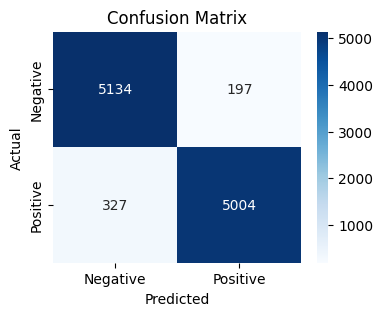

In [ ]:
# Confusion Matrix
confusion_matrix = pd.crosstab(all_reviews["true_label"], all_reviews["predicted_label"], rownames=['Actual'], colnames=['Predicted'])

# plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Metrics
tp, tn, fp, fn, all = (confusion_matrix.loc['Positive', 'Positive'],
                        confusion_matrix.loc['Negative', 'Negative'],
                        confusion_matrix.loc['Negative', 'Positive'],
                        confusion_matrix.loc['Positive', 'Negative'],
                        confusion_matrix.values.sum())

accuracy = (tp + tn) / all if all > 0 else 0
tpr = tp / (tp + fn) if (tp + fn) > 0 else 0 # Sensitivity, Recall
tnr = tn / (tn + fp) if (tn + fp) > 0 else 0 # Specificity
ppv = tp / (tp + fp) if (tp + fp) > 0 else 0 # Precision
npv = tn / (tn + fn) if (tn + fn) > 0 else 0
f1_score = 2 * (ppv * tpr) / (ppv + tpr) if (ppv + tpr) > 0 else 0

print(f""" 
Accuracy: {accuracy:.4f}
True Positive Rate (Recall): {tpr:.4f}
True Negative Rate (Specificity): {tnr:.4f}
Positive Predictive Value (Precision): {ppv:.4f}
Negative Predictive Value: {npv:.4f}
F1 Score: {f1_score:.4f}
      """)

 
Accuracy: 0.9509
True Positive Rate (Recall): 0.9387
True Negative Rate (Specificity): 0.9630
Positive Predictive Value (Precision): 0.9621
Negative Predictive Value: 0.9401
F1 Score: 0.9502
      


In [ ]:
print(f"Accuracy: {accuracy:.1%}")

Accuracy: 95.1%
